In [1]:
import pandas as pd

df = pd.read_csv("../data/creditcard.csv")

# to show shape and structure of the data set
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()

Shape: (284807, 31)

Columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nFraudulent Transactions (Class = 1):", df[df['Class'] == 1].shape[0])
print("Non-Fraudulent Transactions (Class = 0):", df[df['Class'] == 0].shape[0])


Fraudulent Transactions (Class = 1): 492
Non-Fraudulent Transactions (Class = 0): 284315


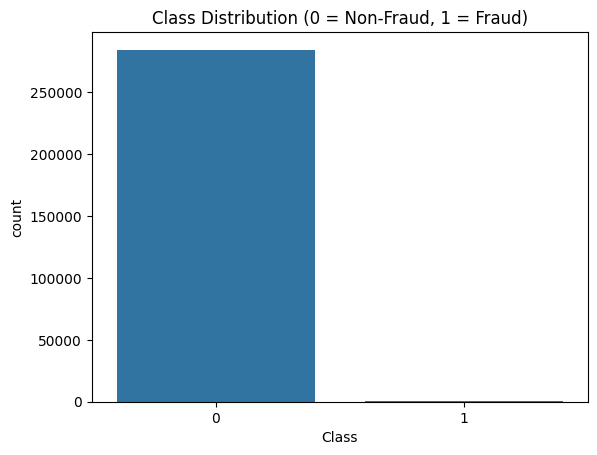

In [3]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

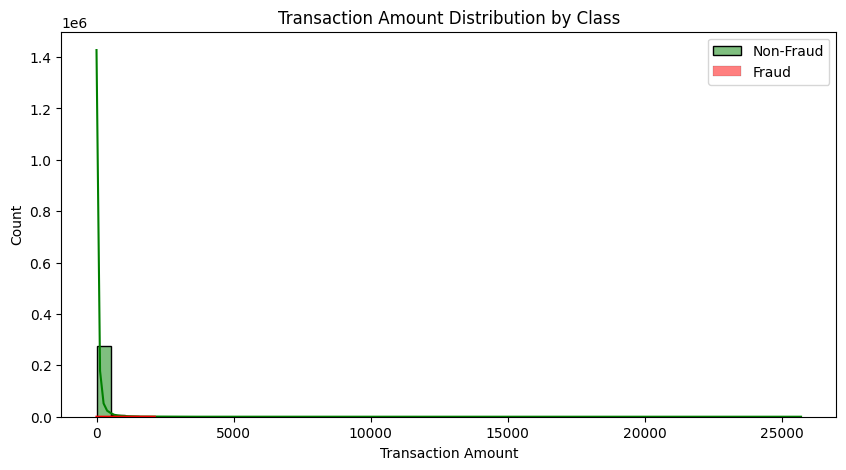

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.show()

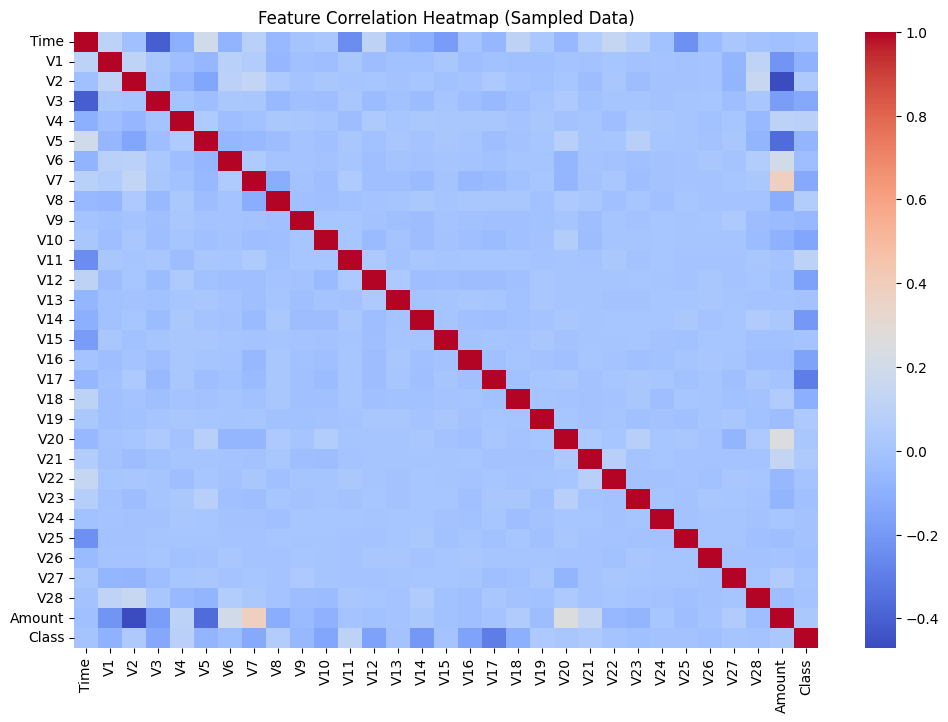

In [ ]:
plt.figure(figsize=(12, 8))
sample_df = df.sample(n=10000, random_state=42)
corr = sample_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap (Sampled Data)')
plt.show()

In [6]:
# we separate not fraud and fraud Class cases
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
print(X.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
# balancing the data set since number of fraud cases are very less
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [9]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56847    17]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
import os
os.makedirs('../models', exist_ok=True)

import joblib
joblib.dump(model, '../models/rf_model.pkl')
joblib.dump(X_train.columns.tolist(), '../models/expected_columns.pkl')

['../models/expected_columns.pkl']